# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на тарифы "Смарт" и "Ультра". Нужно построить модель для задачи классификации, которая выберет подходящий тариф.

Что сделаем?

Исследуем 4 модели на обучающей и валидационной выборках и выберем наилучшую по критерию "наибольшее значение accuracy". Прогоним модель на тестовой выборке и проведем проверку на вменяемость.

## Откроем и изучим файл

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

In [2]:
try:
    df = pd.read_csv('C:/Users/borod/OneDrive/Рабочий стол/DS/project5_tarifs/users_behavior.csv')
except:
    df = pd.read_csv('/datasets/users_behavior.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Пропусков нет, можем работать с данными!

In [3]:
df.head(5)

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


Рассмотрим таблицу, для дальнейшего построения модели выделим признаки `calls`, `minutes`, `messages`, `mb_used`, и целевой признак - `is_ultra`. Целевой признак категориальный, здесь 1 означает, что клиент пользуется тарифом *Ultra*, а 0 - *Smart*, в связи с этим решается задача **бинарной классификации**.

In [4]:
df['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

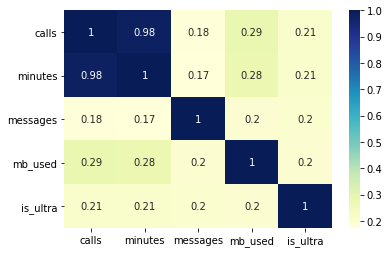

In [5]:
df_plot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)     
plt.show()

## Разобьем данные на выборки

Разделим данные на три выборки: обучающую, валидационную и тестовую. В функции `train_test_split` укажем параметр `stratify` для равномерного распределения количества классов в наборах данных.

In [6]:
df_train, df_valid1 = train_test_split(df, test_size=0.4, random_state=12345, stratify = df['is_ultra'])
df_test, df_valid = train_test_split(df_valid1, test_size=0.5, random_state=12345, stratify = df_valid1['is_ultra'])
print('Доли и размер выборок:\n Обучающая:', df_train.shape[0]/df.shape[0], ',',df_train.shape[0], 
      '\n Валидационная:', df_valid.shape[0]/df.shape[0], ',',df_valid.shape[0],
     '\n Тестовая:',df_test.shape[0]/df.shape[0], ',',df_test.shape[0])

Доли и размер выборок:
 Обучающая: 0.5998755444928439 , 1928 
 Валидационная: 0.2000622277535781 , 643 
 Тестовая: 0.2000622277535781 , 643


## Исследуем модели

Определим признаки и целевой признак в выборках.

In [7]:
#определяем признаки целевой признак в обучающей, валидационной и тестовой выборках.
features_train = df_train.drop(['is_ultra'], axis=1)
target_train = df_train['is_ultra']
features_valid = df_valid.drop(['is_ultra'], axis=1)
target_valid = df_valid['is_ultra']
features_test = df_test.drop(['is_ultra'], axis=1)
target_test = df_test['is_ultra']

В рамках исследования выбрано четыре типа моделей: дерево решений, случайный лес, логистическая регрессия и K-ближайшие соседи. Приступим к реализации.

### Дерево решений

Максимальная глубина = 1 , Accuracy: 0.7293934681181959
Максимальная глубина = 2 , Accuracy: 0.7682737169517885
Максимальная глубина = 3 , Accuracy: 0.7993779160186625
Максимальная глубина = 4 , Accuracy: 0.7744945567651633
Максимальная глубина = 5 , Accuracy: 0.8118195956454122
Максимальная глубина = 6 , Accuracy: 0.7993779160186625
Максимальная глубина = 7 , Accuracy: 0.7978227060653188
Максимальная глубина = 8 , Accuracy: 0.7838258164852255
Максимальная глубина = 9 , Accuracy: 0.7947122861586314
Максимальная глубина = 10 , Accuracy: 0.80248833592535
Максимальная глубина = 11 , Accuracy: 0.7807153965785381
Максимальная глубина = 12 , Accuracy: 0.7682737169517885
Максимальная глубина = 13 , Accuracy: 0.7589424572317263
Максимальная глубина = 14 , Accuracy: 0.7402799377916018
Максимальная глубина = 15 , Accuracy: 0.7402799377916018
Максимальная глубина = 16 , Accuracy: 0.7278382581648523
Максимальная глубина = 17 , Accuracy: 0.7371695178849145
Максимальная глубина = 18 , Accuracy: 0.73

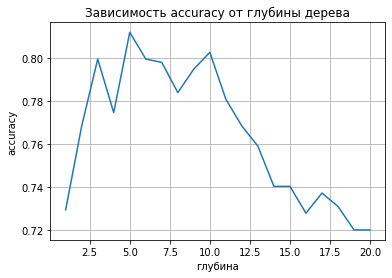

In [8]:
depth_plt= []
accuracy_plt = []
for depth in range(1,21):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train,target_train)
    valid_predict = model.predict(features_valid)
    result = accuracy_score(target_valid, valid_predict)
    depth_plt.append(depth)
    accuracy_plt.append(result)
    print('Максимальная глубина =', depth, ', Accuracy:', result)
plt.plot(depth_plt,accuracy_plt)
plt.title('Зависимость accuracy от глубины дерева')
plt.xlabel('глубина')
plt.ylabel('accuracy')
plt.grid()

**Вывод**: наилучшее accuracy = 0.8118195956454122 достигается при глубине дерева = 5.

[Text(167.4, 190.26, 'X[3] <= 24925.54\ngini = 0.425\nsamples = 1928\nvalue = [1337, 591]'),
 Text(83.7, 135.9, 'X[0] <= 102.5\ngini = 0.366\nsamples = 1666\nvalue = [1265, 401]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 113.5\ngini = 0.327\nsamples = 1537\nvalue = [1221, 316]'),
 Text(20.925, 27.180000000000007, 'gini = 0.307\nsamples = 1503\nvalue = [1218, 285]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.161\nsamples = 34\nvalue = [3, 31]'),
 Text(125.55000000000001, 81.53999999999999, 'X[0] <= 127.5\ngini = 0.449\nsamples = 129\nvalue = [44, 85]'),
 Text(104.625, 27.180000000000007, 'gini = 0.496\nsamples = 94\nvalue = [43, 51]'),
 Text(146.475, 27.180000000000007, 'gini = 0.056\nsamples = 35\nvalue = [1, 34]'),
 Text(251.10000000000002, 135.9, 'X[3] <= 29078.215\ngini = 0.399\nsamples = 262\nvalue = [72, 190]'),
 Text(209.25, 81.53999999999999, 'X[0] <= 86.5\ngini = 0.481\nsamples = 137\nvalue = [55, 82]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.5\n

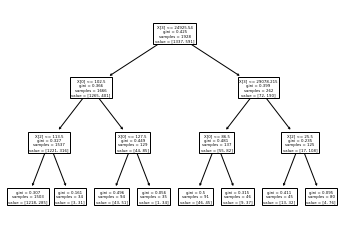

In [9]:
model_cl = DecisionTreeClassifier(random_state=12345, max_depth=3)
model_cl.fit(features_train,target_train)
tree.plot_tree(model_cl)

### Случайный лес

In [10]:
from tqdm import tqdm
est_plt = []
accuracy_plt = []
leaf_plt = []
best_model = None
best_result = 0
best_est = 0
best_leaf = 0
for est in tqdm(range(3,58)):
#for est in range(10, 56,5):
    for leaf in range(2,20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, min_samples_leaf=leaf)
        model.fit(features_train,target_train)
        valid_predict = model.predict(features_valid)
        result = accuracy_score(target_valid, valid_predict) 
        est_plt.append(est)
        accuracy_plt.append(result)
        leaf_plt.append(leaf)
        if result > best_result:
            best_model = model
            best_result = result
            best_est = est
            best_leaf = leaf
print('Количество деревьев =', best_est, ', leaf:',best_leaf, ', accuracy:', best_result)
#fig, ax = plt.subplots()
#ax.scatter(est_plt, accuracy_plt)
#ax.set(xlim=(0, 60), ylim=(0.78, 0.83))
#ax.set_title(label = 'Зависимость accuracy от количества деревьев')
#ax.set_xlabel(xlabel = 'деревья')
#ax.set_ylabel(ylabel = 'accuracy')
#plt.show()

100%|██████████| 55/55 [01:43<00:00,  1.87s/it]

Количество деревьев = 26 , leaf: 5 , accuracy: 0.8273716951788491


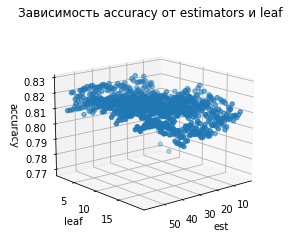

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Зависимость accuracy от estimators и leaf")
ax.set_xlabel('est')
ax.set_ylabel('leaf')
ax.set_zlabel('accuracy')
ax.scatter(est_plt,leaf_plt,accuracy_plt)
ax.view_init(15, 50)
plt.show()

**Вывод**: как видим, максимальное значение качества модели accuracy наблюдается при 26 деревьях (estimators) с параметром min_samples_leaf = 5.

### Логистичекая регрессия

In [12]:
model = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000)
model.fit(features_train, target_train)
valid_predict = model.predict(features_valid)
result = accuracy_score(target_valid, valid_predict)    
result

0.7465007776049767

Здесь результат совсем маленький=(

### Ближайшие соседи

/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

Количество соседей = 1 Accuracy: 0.6967340590979783
Количество соседей = 3 Accuracy: 0.7465007776049767
Количество соседей = 5 Accuracy: 0.7573872472783826
Количество соседей = 7 Accuracy: 0.7713841368584758
Количество соседей = 9 Accuracy: 0.7713841368584758
Количество соседей = 11 Accuracy: 0.7682737169517885
Количество соседей = 13 Accuracy: 0.7651632970451011
Количество соседей = 15 Accuracy: 0.7620528771384136
Количество соседей = 17 Accuracy: 0.76049766718507
Количество соседей = 19 Accuracy: 0.7651632970451011
Количество соседей = 21 Accuracy: 0.76049766718507


/opt/conda/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


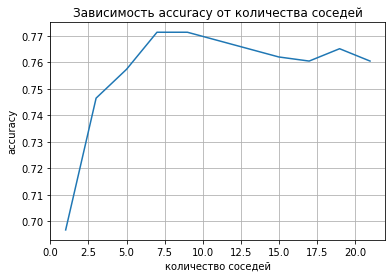

In [13]:
neib_plt= []
accuracy_plt = []
for neib in range(1,22,2):
    model = model = KNeighborsClassifier(n_neighbors = neib)
    model.fit(features_train,target_train)
    valid_predict = model.predict(features_valid)
    result = accuracy_score(target_valid, valid_predict)    
    neib_plt.append(neib)
    accuracy_plt.append(result)
    print('Количество соседей =', neib, 'Accuracy:', result)

plt.plot(neib_plt,accuracy_plt)
plt.title('Зависимость accuracy от количества соседей')
plt.xlabel('количество соседей')
plt.ylabel('accuracy')
plt.grid()

**Вывод**: итак, исследовано 4 модели: дерево решений, случайный лес, логистическая регрессия и ближайшие соседи. 
> Дерево решений показало наилучшее качество модели при максимальной глубине 5. Accuracy = 0.8118195956454122.

> В модели случайного леса наибольшее accuracy = 0.8273716951788491 при 26 деревьях (estimators).

> Логистическая регрессия показала себя хуже всех: accuracy = 0.7465007776049767.

> Модель ближайших соседей с 7,9 соседями выдала accuracy = 0.7713841368584758.

Как видим, наибольшее accuracy из всех моделей получила модель **случайного леса с 26 деревьями**. Возьмем её для дальнейшего исследования.

## Проверим модель на тестовой выборке

In [14]:
model = RandomForestClassifier(random_state=12345, n_estimators=best_est, min_samples_leaf=best_leaf)
model.fit(features_train,target_train)
test_predict = model.predict(features_test)
#accuracy
result = accuracy_score(target_test, test_predict)
#precision
result_prec = precision_score(target_test, test_predict, average=None)
#recall
result_recall = recall_score(target_test, test_predict, average=None)
#F1
result_f1 = f1_score(target_test, test_predict, average=None)
print('Качество модели случайного леса на тестовой выборке: accuracy =', result)
print('Precision модели случайного леса на тестовой выборке  =', result_prec)
print('Recall модели случайного леса на тестовой выборке  =', result_recall)
print('F1 модели случайного леса на тестовой выборке  =', result_recall)
print('\n Матрица ошибок')
confusion_matrix(target_test, test_predict)

Качество модели случайного леса на тестовой выборке: accuracy = 0.8118195956454122
Precision модели случайного леса на тестовой выборке  = [0.8256513  0.76388889]
Recall модели случайного леса на тестовой выборке  = [0.92376682 0.55837563]
F1 модели случайного леса на тестовой выборке  = [0.92376682 0.55837563]

 Матрица ошибок


array([[412,  34],
       [ 87, 110]])

**Вывод**: на тестовой выборке качество модели случайного леса с 50 деревьями получилось accuracy = 0.8149300155520995, что чуть меньше, чем у валидационной выборки, но всё равно считается хорошим результатом.

In [15]:
frames = [df_train, df_valid]
new_train = pd.concat(frames)#объединила валидационную и обучающую выборки
features_train = new_train.drop(['is_ultra'], axis=1) #делаем новые признаки и целевой
target_train = new_train['is_ultra']
model = RandomForestClassifier(random_state=12345, n_estimators=26, min_samples_leaf=5)
model.fit(features_train,target_train)
test_predict = model.predict(features_test)
result = accuracy_score(target_test, test_predict)  
print('Качество модели случайного леса на тестовой выборке: accuracy =', result)

Качество модели случайного леса на тестовой выборке: accuracy = 0.8258164852255054


## Проверим модели на адекватность

В качестве проверки модели на вменяемость был взят фиктивный классификатор DummyClassifier со стратегиями:

- most_frequent - 'наиболее частый'
- stratified - 'cтратифицированный'
- constant - 'постоянный'
- uniform - 'однородный'

In [16]:
strat =  ['most_frequent','stratified','constant','uniform']
for s in strat:
    if s == "constant":
        dummy_clf = DummyClassifier(strategy=s, random_state=12345, constant= 1)
    else:
        dummy_clf = DummyClassifier(strategy=s,random_state=12345)
    dummy_clf.fit(features_train, target_train)
    result = dummy_clf.score(features_test, target_test)
    print(s, result)

most_frequent 0.6936236391912908
stratified 0.5598755832037325
constant 0.30637636080870917
uniform 0.4758942457231726


**Вывод**: результаты проверки по разным стратегиям оказались меньше, чем полученное на тестовой выборке accuracy = 0.8149300155520995. В этой связи делаем заключение, что наша модель адекватна. Ура=)